In [2]:
library(geometry)

library(tidyverse)
library(factoextra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### Principal Components Analysis (PCA)

* A popular dimensionality reduction algorithm

* Attemptes to the find the principal axis that reprent the data  to reducing the dimensionality a dataset
  *  A the same time we want to minimizing information loss

* The objective of PCA is to increase interpretability and mitigate the curse of dimensionality


#### Contextualizing PCA projecting on an existing dimension

* Why not just drop one of the dimensions?

![](https://www.dropbox.com/s/9qz14uo03cn2vsh/projecting_on_x.png?dl=1)


#### Contextualizing PCA projecting on an existing dimension

* Or perhaps drop `Y`? 
   * This projection makes the data look "better"

![](https://www.dropbox.com/s/udzu87138zcovn9/projecting_on_y.png?dl=1)



#### Contextualizing PCA projecting on an existing dimension

* Or project on any axis we desire to project on

![](https://www.dropbox.com/s/tcqkgrydas82jes/projecting_on_z.png?dl=1)


#### Selecting the new dimensions

* How do we select the projection axis (or axes) in the data?
  * Given a dataset with dimension $D$, we need to find a new set of dimensions ($d$) such that $d<<D$
* Some new projections are better than other

<img src="https://www.dropbox.com/s/g8ls7jhzy3kl7jx/bad_better_projection.png?dl=1" alt="drawing" style="width:900px;"/>


### Contextualizing PCA

* We prefer to project on the axis that maximizes the variance in the data. 

* It's helpful to think of the variance as the information that is contained in the data. 

* We want the axis that maximize the information contained in the data.

* This axis, does not have to be one of the axes of the coordinate system.


* If we rotate the data points from the previous example by 45°, then the $x-$axis is no longer the axis that maximizes the variance.



# The Axis Minimizing the Variance

* Now, the line that maximizes the variance is the one that forms 45° angle with the $x-$axis 

![](https://www.dropbox.com/s/otgm3whs20bie81/data_projection_4.png?dl=1)


In [5]:
set.seed(241)
x = sort(rnorm(30, 0, 2))
noise = rnorm(30, 0, 2)
y = 1.2 * x + noise
random_data = data.frame(x, y)
head(random_data)


,x,y
,<dbl>,<dbl>
1,-4.045821,-8.951425
2,-3.747143,-4.673095
3,-1.745603,-2.594928
4,-1.657337,-1.755580
5,-1.431031,-1.299160
6,-1.393483,-1.823733


`geom_smooth()` using formula 'y ~ x'



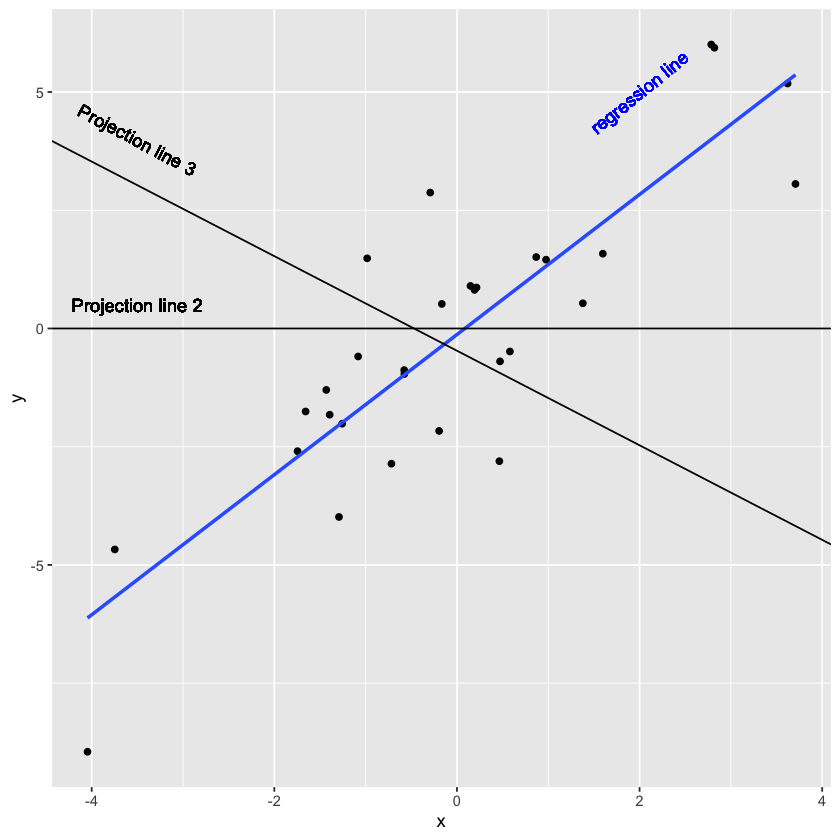

In [6]:
ggplot(random_data, aes(x,y))+
  geom_point() +
  geom_smooth(method="lm" , se=FALSE) +
  geom_abline(intercept = 0, slope=0) +
  geom_abline(intercept=-0.47, slope=-1) +
  geom_text(aes(x=2, y=5, label="regression line"), colour="blue", angle=39) +
  geom_text(aes(x=-3.5, y=0.5, label="Projection line 2"), colour="black") +
  geom_text(aes(x=-3.5, y=4, label="Projection line 3"), colour="black", angle=-28)



<img src="https://www.dropbox.com/s/earjhzutb1yx48x/axes.png?dl=1" alt="drawing" style="width:500px;"/>

<img src="https://www.dropbox.com/s/cupxib5e7k13qcc/projection_vectors_.png?dl=1" alt="drawing" style="width:500px;"/>


In [10]:
head(random_data)

,x,y
,<dbl>,<dbl>
1,-2.9670658,-1.16352937
2,-2.5658632,-3.12042051
3,-1.7871659,-2.00053709
4,-1.5247383,-3.60865284
5,-0.9040250,-3.67861068
6,-0.8409482,0.04713081


In [11]:
A=c(3,2)
B=c(1,1)

dot(A,B)

[1] 5

In [12]:
apply(random_data, 1, dot, c(1,1))


[1] -4.13059517 -5.68628369 -3.78770299 -5.13339117 -4.58263568 -0.79381739
 [7] -1.86507817 -4.45714718 -1.66489293  0.96296094  0.25479720  0.04240295
[13] -1.19892387 -1.41458867  0.79958948  0.88255290 -0.78644072  0.35215561
[19] -0.82493271  1.61157971  1.51686838  2.34251727  1.66515077  5.15061105
[25]  5.64196323  9.56957273  6.17837641  5.52907727 11.06240964 14.23970267

In [13]:
# Best looking projection line
projections_1_1 = apply(random_data, 1, dot, c(1,1))
var(projections_1_1)

[1] 23.07156

In [14]:
# Second best looking projection line
projections_1_0 = apply(random_data, 1, dot, c(1,0))
var(projections_1_0)



[1] 4.390524

In [15]:
# Third best looking projection line
projections_1_m0p5 = apply(random_data, 1, dot, c(1,-0.5))
var(projections_1_m0p5)



[1] 1.334628

Warning message:
“Removed 1 rows containing missing values (geom_point).”


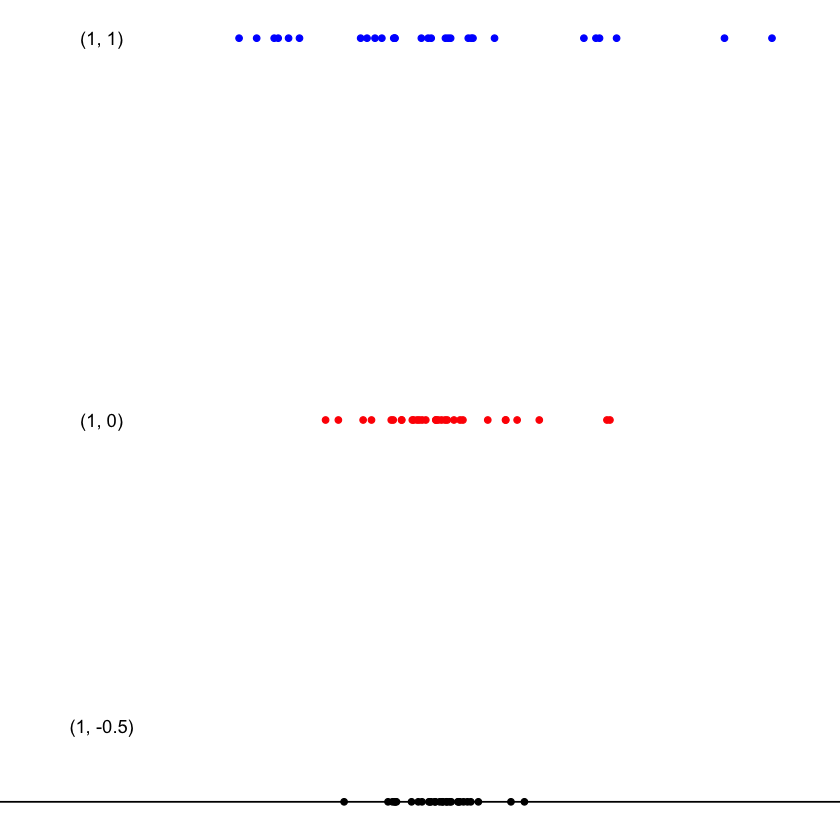

In [16]:
ggplot()+
  geom_abline(intercept = 0, slope=0)+
  geom_point(aes(x = projections_1_1, y=0.5), color ="blue")+
  geom_text(aes(x=-10, y=0.5, label="(1, 1)"), colour="black") +

  geom_point(aes(x = projections_1_0, y=0.25), color ="red")+
  geom_text(aes(x=-10, y=0.25, label="(1, 0)"), colour="black") +

  geom_point(aes(x = projections_1_m0p5, y=0), color ="black")+
  geom_text(aes(x=-10, y=0.05, label="(1, -0.5)"), colour="black") +
  theme_void() + 
  xlim(-12,12)
  


### What is PCA?

The objective of PCA is to find the set of axes -- we call them components -- on which we project the data while maintaining as much of the information as possible. 

* PCA finds the **set of all** axes that contain **all the variance** in the data.


* We typically only use two or three if we need to visualize the data
* We pick as many components as needed to capture as much variability in the data as we desire
  * Be able abo to reproduce the original data


### Requirement of the PCA?

* The two important requirements are that:
  * The new components are ranked by how much variability in the data they capture. For instance, the first component captures more variability than the second component, the second more than the third and so on.
  * The components are not correlated -- they are orthogonal.
    * why are orthogonal components not-correlated? 
    * We need this as a constraint to force components to be different, i.e., we need to components to tell us different things about the data

### Eigenvalues and Eigenvectors

* Eigenvalues and eigenvectors are concept of linear algebra.

- An __eigenvector__ is a non-zero vector that only changes by an overall scale when a linear transformation is applied to it, i.e., when a matrix is multiplied by it

  * In other words, multiplying a matrix by that vector produces a vector that is only stretched or shrunk and not rotated.
  
- An __eigenvalue__ is simply the scalar value $\lambda$ by which the vector was stretched during the linear transformation.

In other words:

$$
\mathbf{A} \mathbf{u} = \lambda\mathbf{u}
$$


Example. Given: 
    
$$
A =
\left( \begin{array}{cc}
3 & -5 \\
1 & 2 \\
\end{array} \right)
$$ is $\mathbf{u}$, where 
$$
\mathbf{u}= \left( \begin{array}{c}
1\\
4\\
\end{array} \right)
$$
an eigenvector for A?


### Linear Transformation

<img src="https://www.dropbox.com/s/06w956xkjp2x9wp/multiplication_1.png?dl=1" alt="drawing" style="width:500px;"/>


*$\mathbf{u}$ is not the linear transformation of $\mathbf{A}$.

### Finding Eigenvector

* We find a eigenvector for A using the `linalg` module in `numpy`

$$
A =
\left( \begin{array}{cc}
3 & 0 \\
1 & 6 \\
\end{array} \right)
$$

In [17]:
A = rbind(c(3,0), c(1,6))
A

3,0
1,6


In [18]:
ev = eigen(A)
ev$vectors


0,0.9486833
1,-0.3162278


This means that 
$$
\mathbf{u_1}= \left( \begin{array}{c}
0\\
1\\
\end{array} \right)
$$ is a first eigenvector and 

$$
\mathbf{u_2}= \left( \begin{array}{c}
0.9486833 \\
-0.31622777\\
\end{array} \right)
$$ is a second eigenvector

![](https://www.dropbox.com/s/1y0ddnwo5ij0t8h/multiplication_2.png?dl=1)


### Finding Eigenvalues and Eigenvectors

* Mutiplying the martix by the $\mathbf{u_1}$ scales the vector by 6, 

* Multiplying by $\mathbf{u_2}$ scales the vector by 3. 

* The values 6 and 3 the weights, or eigenvalues, of $u_1$ and $u_2$ respectively.

In [22]:
ev$values

[1] 6 3

### Scaling the data


* This is a  critical point that we need to consider before carrying out the PCA. 

  * We don't want the variance over one axis (variable) to bias the data simply because the scale is different. 

* Ex. consider $x_1$ measures weights in grams for mammalian animal species and $x_2$ measures progeny size. 
  * Here, $x_1$ can be orders of magnitude larger than the $x_2$ progeny size, 
    * This can substantially bias the results



### Scaling the data - Cont'd 


* The first step that is usually carried out in PCA is normlizaing the data

  * Rescaling the data by centering it at 0, and normalizing by the variance; this is called the standard score
  * Expressing the data in term of standard deviations

$$
x_{new}=\frac{x -\mu}{\sigma}
$$

* Data can be used to find  the eigenvector with the largest eigenvalue and project on that vector first

### Constraints on the Data

* Given an original dimension $m$

* The matrix $\mathbf{A}_{m\times n}$ must be square; i.e. $m=n$ 
  
  * If $m\ne n$, then $\mathbf{A}_{n \times m} \cdot \mathbf{u}_{m\times 1}  = \mathbf{v}_{n \times 1} \implies \mathbf{v} \ne \mathbf{u}$ 
  
    * The resulting vector $\mathbf{v}$ has a different dimension that $\mathbf{u}$
  


### Constraints on the Data - Cont'd


* Recall, however, that what we are interested is identifying the axes that maximize the variances. 


* Therefore, we can use the covariance matrix, $\Sigma$
  * We can identify the eigenvectors of $\Sigma$ instead



* An entry (i,j) in covariance matrix $\Sigma$  describes the covariance between features(variables) $i$ and $j$. 

  * For $i=j$, the matrix describes the variance for the variable $i$.


In [23]:
### Rescaling the data 

c(mean(random_data$x), sd(random_data$x))
c(mean(random_data$y), sd(random_data$y))


[1] 0.7225585 2.0953578

[1] 0.3266367 2.8947359

In [24]:
random_data_scaled = random_data %>% scale %>% as_tibble

head(random_data_scaled)

x,y
<dbl>,<dbl>
-1.7608565,-0.51478483
-1.5693843,-1.19080199
-1.1977546,-0.80393304
-1.0725122,-1.35946412
-0.7762796,-1.38363139
-0.7461765,-0.09655662


In [25]:
### Rescaling the data 

c(mean(random_data_scaled$x), sd(random_data_scaled$x))
c(mean(random_data_scaled$y), sd(random_data_scaled$y))


[1] 5.016242e-18 1.000000e+00

[1] 1.162988e-17 1.000000e+00

In [26]:
cov_matrix  = cov(random_data_scaled)
cov_matrix

,x,y
x,1.0000000,0.8491903
y,0.8491903,1.0000000


In [27]:
ev = eigen(cov_matrix)

print(ev$vectors)

print(ev$values)


          [,1]       [,2]
[1,] 0.7071068 -0.7071068
[2,] 0.7071068  0.7071068
[1] 1.8491903 0.1508097


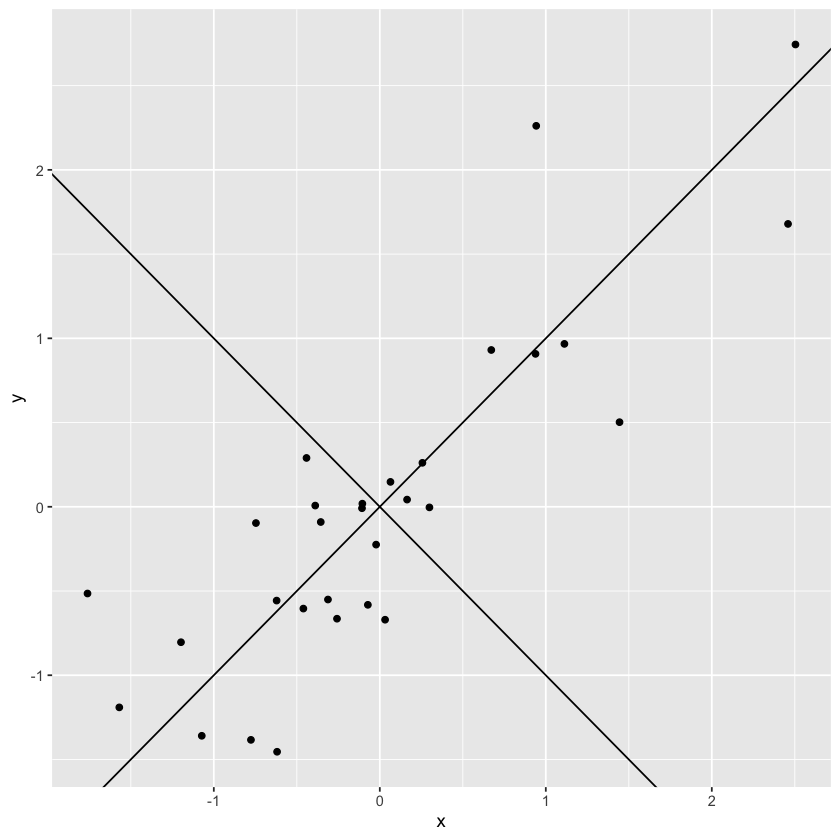

In [28]:
ggplot(random_data_scaled, aes(x, y))+
  geom_point() +
  geom_abline(intercept=0,slope=ev$vectors[1,1]/ev$vectors[2,1]) +
  geom_abline(intercept=0,slope=ev$vectors[1,2]/ev$vectors[2,2])

### Eigenvalues Explain the Variance in the Data

* Eigenvalues explain the variance captured by their Eigenvectors


* We need to transform them into a percentage 
  * Dividing each eigenvalue by the sum of eigenvalues.
  
* Somewhat similar to the $R^2$ discussed in linear regrssion
  
  


In [29]:
ev$values

ev$values/sum(ev$values)


[1] 1.8491903 0.1508097

[1] 0.92459515 0.07540485

### Eigenvalues Explain the Variance in the Data

* The first eigenvector captures of 92.1% of the total variance in the data. 
* By projecting on that eigenvector, our data retains most of its variance. 
  * We can project on simply by multiplying the original data by the the eigenvector
  * As we did in the previous example

In [41]:
z = apply(random_data, 1, dot, c(ev$vectors[1,1], ev$vectors[2,1]))
project_new_data = data.frame(z)
head(project_new_data)

,z
,<dbl>
1,-2.9207719
2,-4.0208098
3,-2.6783105
4,-3.6298557
5,-3.2404128
6,-0.5613137


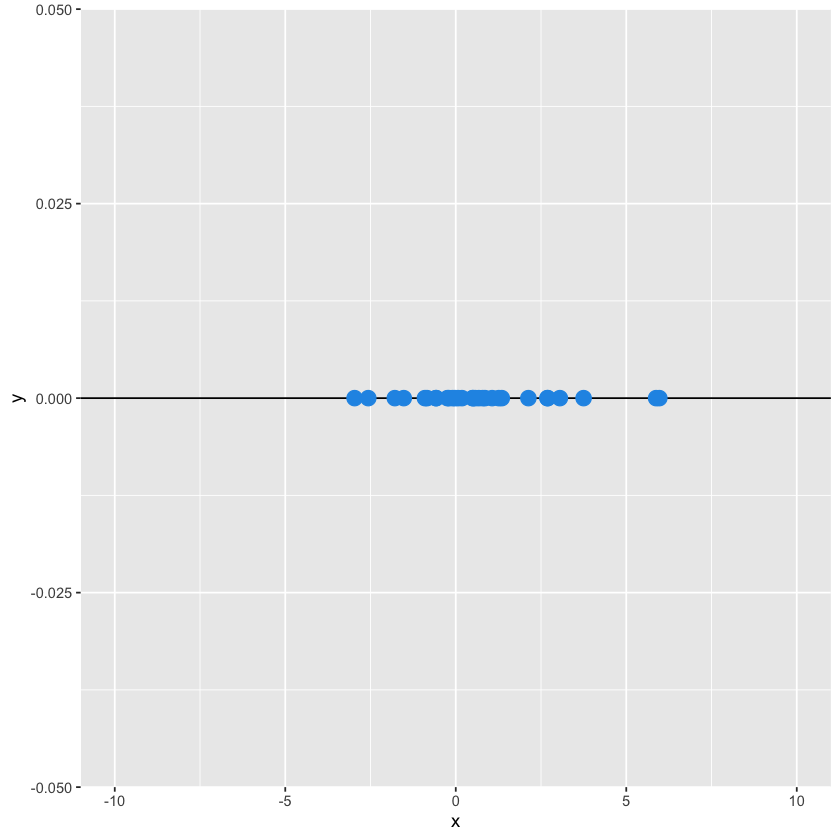

In [42]:
ggplot(project_new_data)+
  geom_abline(intercept=0, slope=0) +
  geom_point(aes(x, y=0), size =4, color=4)+
  xlim(-10,10)


## Running PCA in R 

* Two diffetent method to do PCA in R

  * `princomp()`: Uses spectral decomposition which examines the covariances / correlations between variables
  * `prcomp()` : Uses singular value decomposition which examines the covariances / correlations between individuals

Other external libraries that can be in installed
  * PCA() in `FactoMineR` use the singular value decomposition (SVD).

In [43]:
res_pca = prcomp(random_data, scale=TRUE)
summary(res_pca)

Importance of components:
                          PC1    PC2
Standard deviation     1.3598 0.3883
Proportion of Variance 0.9246 0.0754
Cumulative Proportion  0.9246 1.0000

In [44]:
str(res_pca)

List of 5
 $ sdev    : num [1:2] 1.36 0.388
 $ rotation: num [1:2, 1:2] 0.707 0.707 -0.707 0.707
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "x" "y"
  .. ..$ : chr [1:2] "PC1" "PC2"
 $ center  : Named num [1:2] 0.723 0.327
  ..- attr(*, "names")= chr [1:2] "x" "y"
 $ scale   : Named num [1:2] 2.1 2.89
  ..- attr(*, "names")= chr [1:2] "x" "y"
 $ x       : num [1:30, 1:2] -1.61 -1.95 -1.42 -1.72 -1.53 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "PC1" "PC2"
 - attr(*, "class")= chr "prcomp"


In [45]:
res_pca$rotation

,PC1,PC2
x,0.7071068,-0.7071068
y,0.7071068,0.7071068


In [46]:
res_pca$sdev^2

[1] 1.8491903 0.1508097

In [47]:
    
res_pca$sdev^2 / sum(res_pca$sdev^2)

[1] 0.92459515 0.07540485

In [57]:
res_pca$rotation[2,1]

[1] 0.7071068

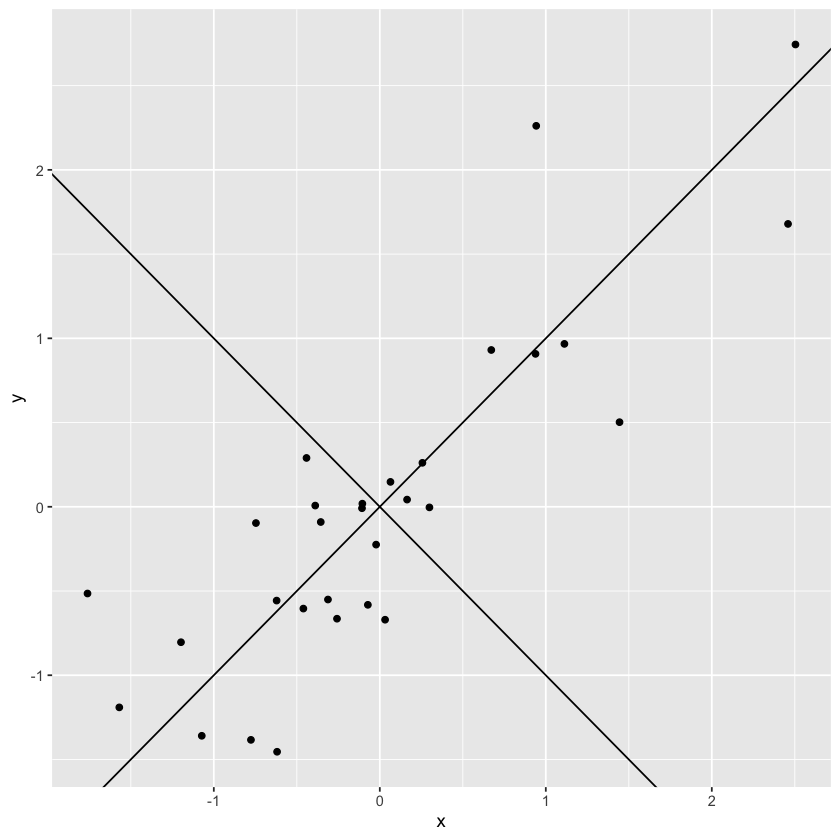

In [58]:
ggplot(random_data_scaled, aes(x, y))+
  geom_point() +
  geom_abline(intercept=0,slope=res_pca$rotation[1,1]/res_pca$rotation[2,1]) +
  geom_abline(intercept=0,slope=res_pca$rotation[1,2]/res_pca$rotation[2,2])

<img src="https://www.dropbox.com/s/y3nmp8p2o9akiht/eig_vecs.png?dl=1" alt="drawing" style="width:900px;"/>


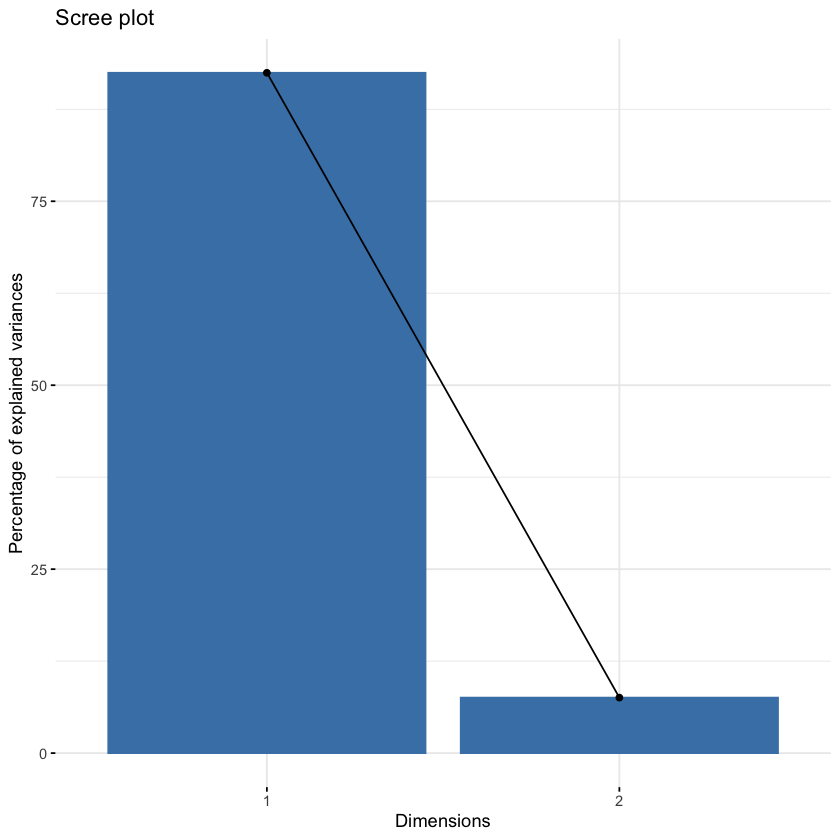

In [48]:
fviz_eig(res_pca)

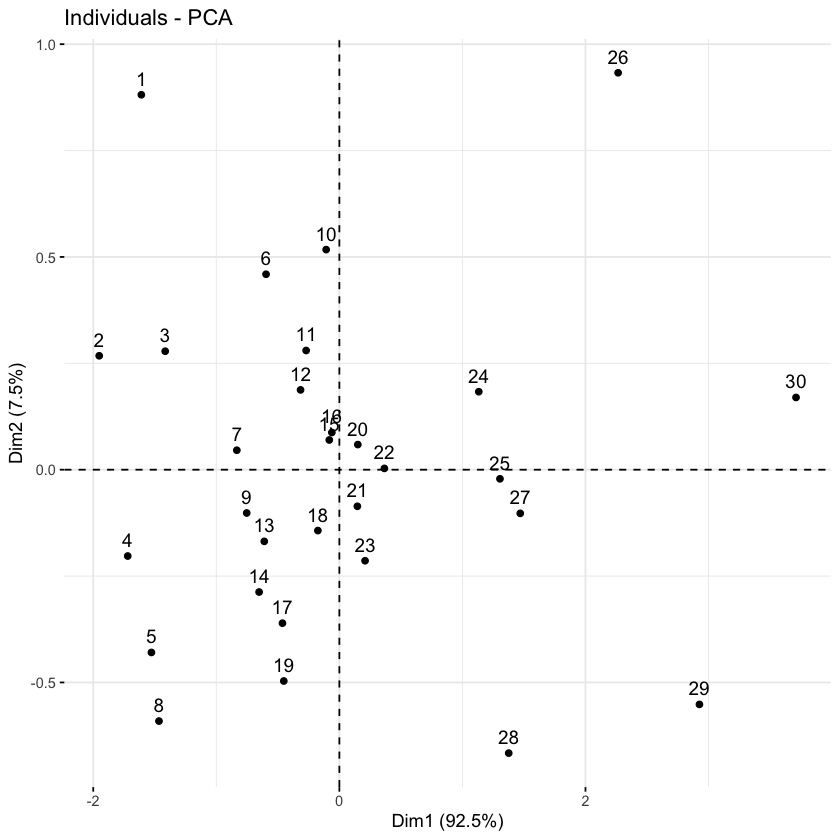

In [53]:
fviz_pca_ind(res_pca)

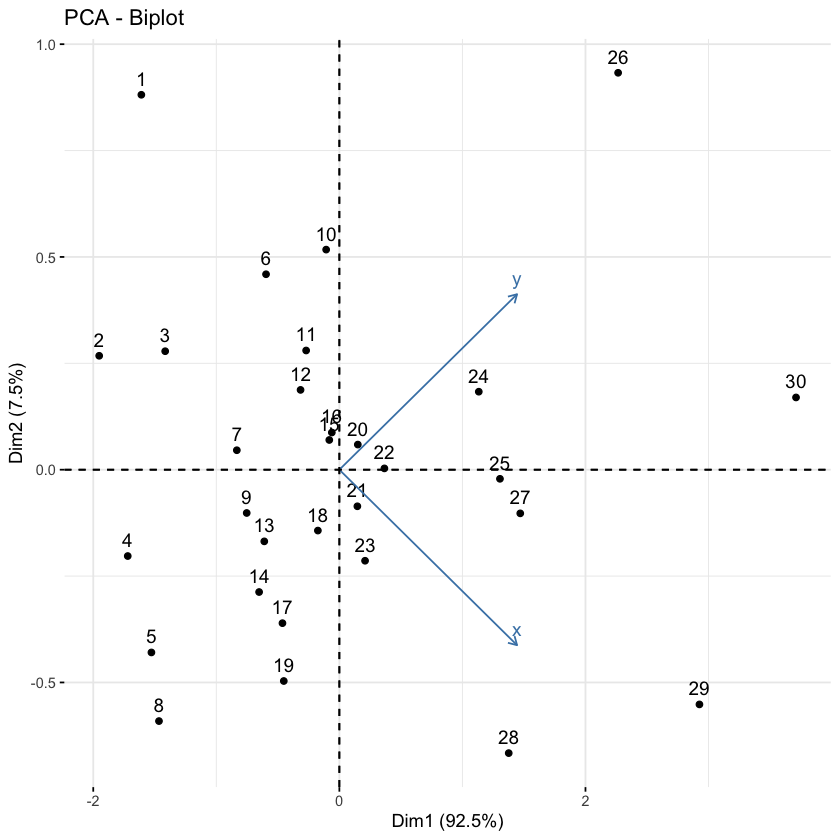

In [59]:
fviz_pca_biplot(res_pca)

### PCA Advantages and Limitations
* Advantages
  * Handles linear data well  weird and curved shaped surfaces necessitated development of more advanced algorithms like Manifold 

* Limitations
  * non-linear weird and curved shaped surfaces necessitated development of more advanced algorithms like Manifold Learning. 
    * Linear dimensionality reduction cannot cluster data with non-linear global structure.
 * Does not handle large datasets
  


<img src="https://www.dropbox.com/s/ukkk7i4s4ppya0h/swiss_roll.png?dl=1" alt="drawing" style="width:500px;"/>

### PCA  Limitations
* PCA is unsupervised does not take labels into account.
  * If your data is labeled, PCA cannot take that information into considerations to produce better clusters
  * Method such as LDA or methods based on Correlation Analysis (CA) are used when label data is provided 


### Points Crowding Problem

* a major issue when reducing the dimensionality of high-dimensional data is the crowding issue.

  * Somewhat similar points in very high dimension collapsing on top of each other in lower dimensions 
  * A lot more space in higher dimensions than lower dimensions, so data can vary in many more ways in higher dimensions yet be very crowded in a lower dimension embedding.

![](https://www.dropbox.com/s/5qh34vny41e0hka/crowding.png?dl=1)

### PCA on Very Large Datasets

* PCA assumes that we can store the data, the covariance matrix in RAM.
  * This is often possible with datasets that have a very large number of features.
  * Few GB with a dataset with 15k features  
* May not scale for datasets having hundreds of thousands of features.
* Alternative implementations to handle large data
  * Incremental principal component analysis (IPCA) (implemented in scikit-learn)
  * Distributed computation (Implemented in Spark's mllib )
  * Probabilistic approach with theoretical guarantees (ex. ProPCA package)      
  * etc...